In [ ]:
!pip install wfdb==1.3.9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/mit-bih-arrhythmia-database-1.0.0" -r "/content"

In [ ]:
!cp "/content/drive/MyDrive/ecg_data_with_labels-5_cleaned-6.csv" -r "/content"

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

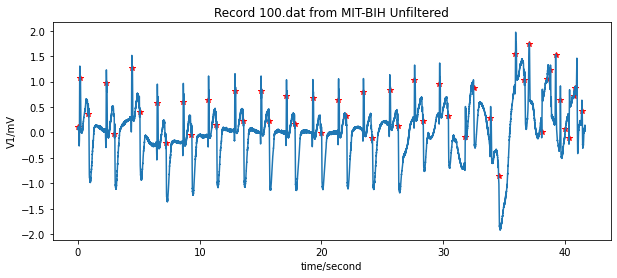

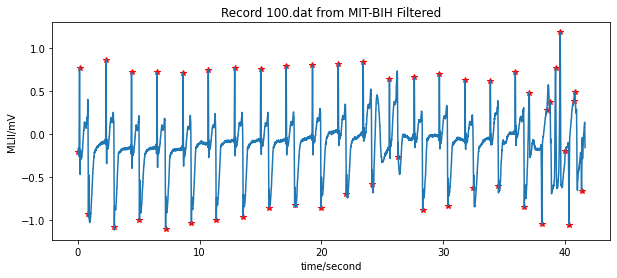

{'adcgain': [200.0],
 'adcres': [11],
 'adczero': [1024],
 'basecounter': None,
 'basedate': None,
 'baseline': [1024],
 'basetime': None,
 'blocksize': [0],
 'byteoffset': [None],
 'checksum': [1690],
 'comments': ['89 F 859 694 x1',
  'Digoxin, Quinaglute',
  'This is an extremely difficult record.  The predominant rhythm is normal',
  'sinus with first degree AV block and left bundle branch block.  There are',
  'periods when the conduction block changes to a right bundle branch block',
  'pattern.  The PVCs are multiform.  Idioventricular rhythm appears following',
  'the longest episode of ventricular flutter.  The record ends during the',
  'episode of SVTA.'],
 'counterfreq': None,
 'd_signals': None,
 'e_d_signals': None,
 'e_p_signals': None,
 'filename': ['207.dat'],
 'fmt': ['212'],
 'fs': 360,
 'initvalue': [981],
 'nsig': 1,
 'p_signals': array([[-0.215],
        [-0.215],
        [-0.215],
        ...,
        [-0.155],
        [-0.155],
        [-0.155]]),
 'recordname':

{'recordname': '207', 'extension': 'atr', 'sample': array([    9,    50,   312,   835,  1078,  1588,  1821,  2342,  2593,
        3111,  3357,  3857,  4092,  4637,  4889,  5409,  5648,  6160,
        6408,  6939,  7191,  7700,  7937,  8437,  8694,  9215,  9463,
        9949, 10196, 10689, 10939, 11450, 11699, 12197, 12436, 12936,
       13200, 13348, 13717, 13868, 13967, 14125, 14263, 14414, 14522,
       14665, 14689, 14894]), 'symbol': ['+', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'R', 'V', 'V', 'L', '+', 'V', 'V', 'V', '+', 'L', '[', '+', '!'], 'subtype': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0]), 'chan': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy as sp
from scipy import signal
import numpy as np



#MIT-BIH dataset sampled at 360 samples per second. 
#ELM paper denoted 0.65 seconds per heartbeat.
#we will sample from any starting value x to x+0.65*360



def median_filter(signal):
  result_array = []
  #print(signal.shape[0])
  for index in range(0, signal.shape[0]):
    if(index==0):
      temp_array = [0,0,signal[index][0],signal[index+1][0],signal[index+2][0]]
      temp_array.sort()
      #print(temp_array)
      result_array.append([temp_array[2]])
      
    elif(index ==1):
      temp_array = [0, signal[index-1][0], signal[index][0],signal[index+1][0],signal[index+2][0]]
      temp_array.sort()
      #print(temp_array)
      result_array.append([temp_array[2]])
    elif(index == signal.shape[0]-2):
      temp_array=[signal[index-2][0], signal[index-1][0], signal[index][0],signal[index+1][0],0]
      temp_array.sort()
      result_array.append([temp_array[2]])
    elif(index==signal.shape[0]-1):
      temp_array=[signal[index-2][0], signal[index-1][0], signal[index][0],0,0]
      temp_array.sort()
      #print(temp_array)
      result_array.append([temp_array[2]])
    else:
      temp_array = [signal[index-2][0], signal[index-1][0], signal[index][0],signal[index+1][0],signal[index+2][0]]
      temp_array.sort()
      
      result_array.append([temp_array[2]])
  return np.array(result_array)


record = wfdb.rdsamp('/content/mit-bih-arrhythmia-database-1.0.0/207', sampto=15000, channels=[0])
record2 = wfdb.rdsamp('/content/mit-bih-arrhythmia-database-1.0.0/207', sampto=15000, channels = [1])

annotation = wfdb.rdann('/content/mit-bih-arrhythmia-database-1.0.0/207','atr', sampto=15000)

record.p_signals = median_filter(record.p_signals)
record.p_signals = median_filter(record.p_signals)

#wfdb.plot_wfdb(record, annotation = annotation, title = 'Rec 100 from Arrythmia Database',timeunits = 'seconds', figsize = (10,4), ecggrids = 'all')
#print (record.p_signals)
wfdb.plotrec(record=record2, annotation = annotation, title='Record 100.dat from MIT-BIH Unfiltered',figsize=(10,4), timeunits="seconds") 
wfdb.plotrec(record=record, annotation = annotation, title='Record 100.dat from MIT-BIH Filtered',figsize=(10,4), timeunits="seconds") 

display(record.__dict__)
#print(record.p_signal)
#print(np.median(record.p_signal))
print(annotation.__dict__)
#Annotation R-peaks in annotation.__dict__.array




In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

df = pd.read_csv("/content/ecg_data_with_labels-5_cleaned.csv")



In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd

row = df.iloc[27691]
row_signal = row.drop("record")
row_signal = row_signal.drop("beat")
row_signal = row_signal.drop("label")
row_signal = row_signal.drop("Unnamed: 0")

plt.plot(row_signal)
plt.show()

print(row)



In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
import pandas as pd

df = pd.read_csv("/content/ecg_data_with_labels-5_cleaned-2.csv")

df=df[df["label"]!='"']
df=df[df["label"]!='|']
df=df[df["label"]!='~']
df=df[df["label"]!='+']
df=df[df["label"]!='x']
df=df[df["label"]!='!']
df=df[df["label"]!='[']
df=df[df["label"]!=']']


#df=df[df["record"]!=114]

'''for index,row in df.iterrows():
  if (row["label"]!="N" and row["label"]!="L" and row["label"]!="R" and row["label"]!="A" and row["label"]!="a" and row["label"]!="S" and row["label"]!="J"):
    df.loc[index,"label"]="A"
  else:
    df.loc[index,"label"]="N"
df.to_csv("ecg_data_with_labels-5_cleaned-3", index=False)'''
for index,row in df.iterrows():
  if (row["label"]=="E"):
    df.loc[index,"label"]="Q"
  elif(row["label"]=="S"):
    df.loc[index,"label"]="N"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import numpy


X = df.iloc[:, 4:238]
X=Normalizer(norm="l1").fit_transform(X)
Y = df.label




X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

model = RandomForestClassifier(max_depth=25)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))



print(set(Y))

0.919732245089692
{'V', 'Q', '/', 'a', 'A', 'S', 'N', 'f', 'J', 'R', 'e', 'F', 'L', 'j', 'E'}


<function matplotlib.pyplot.show>

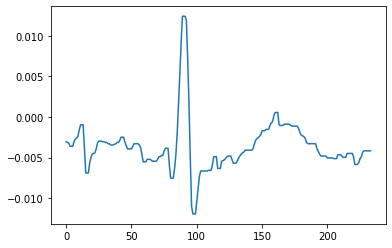

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X[59537])
plt.show

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy

X = df.iloc[:, 4:238]


X=Normalizer("l1").fit_transform(X)

Y = df.label




X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))


In [ ]:
df.to_csv("ecg_data_with_labels-5_cleaned-4", index=False)

In [ ]:
!cp "/content/ecg_data_with_labels-5_cleaned-3" -r "/content/drive/MyDrive"

In [ ]:
from sklearn.manifold import TSNE

from sklearn.preprocessing import Normalizer
from numpy import reshape
import seaborn as sns
import pandas as pd

df = pd.read_csv("/content/ecg_data_with_labels-5_cleaned-2.csv")

df=df[df["label"]!='"']
df=df[df["label"]!='|']
df=df[df["label"]!='~']
df=df[df["label"]!='+']
df=df[df["label"]!='x']
df=df[df["label"]!='!']
df=df[df["label"]!='[']
df=df[df["label"]!=']']

X = df.iloc[:, 4:238]


x=Normalizer("l1").fit_transform(X)

y = df.label
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                
                
                data=df).set(title="MIT-BIH T-SNE projection")

df.to_csv("TSNE.csv", index=False)


In [ ]:
!cp "/content/TSNE.csv" -r "/content/drive/MyDrive"

In [ ]:
import pandas as pd

df = pd.read_csv("/content/TSNE.csv")



#df=df[df["record"]!=114]

for index,row in df.iterrows():
  if (row["y"]!="N" and row["y"]!="L" and row["y"]!="R" and row["y"]!="A" and row["y"]!="a" and row["y"]!="S" and row["y"]!="J"):
    df.loc[index,"y"]="A"
  else:
    df.loc[index,"y"]="N"
df

In [ ]:
import seaborn as sns
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                
                
                data=df).set(title="MIT-BIH T-SNE projection")

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from numpy import collections
import numpy as np

from sklearn.preprocessing import Normalizer
from numpy import reshape
import seaborn as sns
import pandas as pd

'''df = pd.read_csv("/content/ecg_data_with_labels-5_cleaned-2.csv")

df=df[df["label"]!='"']
df=df[df["label"]!='|']
df=df[df["label"]!='~']
df=df[df["label"]!='+']
df=df[df["label"]!='x']
df=df[df["label"]!='!']
df=df[df["label"]!='[']
df=df[df["label"]!=']']'''



X = df.iloc[:, 4:238].values


X=Normalizer("l1").fit_transform(X)

Y = df.label

pca = PCA(n_components=15)
X = pca.fit_transform(X)

np.sum(pca.explained_variance_ratio_)




0.9519094783839506

In [ ]:
collections.Counter(Y)


Counter({'/': 6998,
         'A': 2398,
         'F': 797,
         'J': 83,
         'L': 6594,
         'N': 71621,
         'Q': 34,
         'R': 7149,
         'V': 6167,
         'a': 149,
         'e': 16,
         'f': 980,
         'j': 228})

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_validate
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import numpy as np
import collections
from imblearn.over_sampling import SMOTE



model = RandomForestClassifier(n_estimators=150, max_depth=50)
oversample = SMOTE(k_neighbors=1)
over_X, over_Y = oversample.fit_resample(X, Y)
over_X_train, over_X_test, over_Y_train, over_Y_test = train_test_split(over_X, over_Y, test_size=0.33, stratify=over_Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)
model.fit(over_X_train, over_Y_train)
Y_pred = model.predict(X_test)


print(accuracy_score(Y_test, Y_pred))


#print(Y_pred_proba)
print(collections.Counter(Y_test))
print(collections.Counter(Y_pred))

0.987581104489005
Counter({'N': 23635, 'R': 2359, '/': 2310, 'L': 2176, 'V': 2035, 'A': 791, 'f': 324, 'F': 263, 'j': 75, 'a': 49, 'J': 28, 'Q': 11, 'e': 5})
Counter({'N': 23278, 'R': 2360, '/': 2328, 'V': 2261, 'L': 2185, 'A': 803, 'f': 336, 'F': 329, 'j': 86, 'a': 51, 'J': 28, 'Q': 11, 'e': 5})


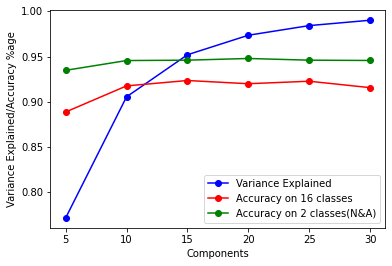

In [ ]:
import matplotlib.pyplot as plt

components=[5,10,15,20,25,30]
variance=[0.7719261863291447,0.9054991192371911,0.9519094783774229,0.9734399524071106,0.984083428082476,0.9900029071326357]
accuracy=[0.8887877631308535,0.917559672352544,0.9235249405478406, 0.9199671178180323,0.9227268723760312,0.9156513314347787]
accuracy2=[0.9347640997034732,0.9455388861160858,0.9459499133906815,0.9478288952174041,0.9459499133906815,0.9456269633892135]
plt.plot(components,variance,marker="o", color="blue", label="Variance Explained")
plt.xlabel("Components")
plt.ylabel("Variance Explained/Accuracy %age")
plt.plot(components, accuracy, marker="o", color="red",label="Accuracy on 15 classes")
plt.plot(components, accuracy2, marker="o", color="green", label="Accuracy on 2 classes(N&A)")
plt.legend()
plt.show()

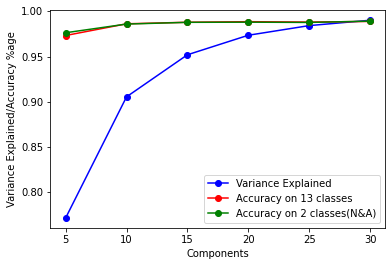

In [ ]:
import matplotlib.pyplot as plt

components=[5,10,15,20,25,30]
variance=[0.7719261863291447,0.9054991192371911,0.9519094783774229,0.9734399524071106,0.984083428082476,0.9900029071326357]
accuracy=[0.9731657907871172,0.9860837908458354,0.9877866181263029,0.9884325181292387,0.9879921317636006,0.988667390857579]
accuracy2=[0.9762191362555416,0.98579019993541,0.9876985408531752,0.9878746953994304,0.987581104489005,0.9890196999500895]
plt.plot(components,variance,marker="o", color="blue", label="Variance Explained")
plt.xlabel("Components")
plt.ylabel("Variance Explained/Accuracy %age")
plt.plot(components, accuracy, marker="o", color="red",label="Accuracy on 13 classes")
plt.plot(components, accuracy2, marker="o", color="green", label="Accuracy on 2 classes(N&A)")
plt.legend()
plt.show()

In [ ]:
df.to_csv("ecg_data_with_labels-5_cleaned-6.csv", index=False)

In [ ]:
!cp "/content/ecg_data_with_labels-5_cleaned-6.csv" -r "/content/drive/MyDrive"

In [ ]:
import pandas as pd

df=pd.read_csv("/content/ecg_data_with_labels-5_cleaned-6.csv")
X=df.iloc[:,4:238]
Y=df.label


0         N
1         N
2         N
3         N
4         N
         ..
103209    N
103210    N
103211    N
103212    N
103213    N
Name: label, Length: 103214, dtype: object